In [ ]:
!pip install ucimlrepo

## K-Means clustering implementation on Rice Dataset

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans

# Fetch dataset
rice_cammeo_and_osmancik = fetch_ucirepo(id=545)

# Data (as pandas dataframes)
X = rice_cammeo_and_osmancik.data.features.values
Y = rice_cammeo_and_osmancik.data.targets.values

# If Y is categorical, convert it to numerical values using LabelEncoder
label_encoder = LabelEncoder()
Y_numerical = label_encoder.fit_transform(Y)

# Perform k-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# One Hot encode the cluster labels
encoder = OneHotEncoder(sparse=False, sparse_output=False)  # Updated parameter based on the warning
one_hot_clusters = encoder.fit_transform(cluster_labels.reshape(-1, 1))

# Concatenate the one hot encoded clusters to X array
X = np.concatenate((X, one_hot_clusters), axis=1)

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_numerical, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a simple neural network
nn_model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
nn_model.fit(X_train_scaled, Y_train)

# Make predictions and calculate mean squared error
Y_pred = nn_model.predict(X_test_scaled)
mse = mean_squared_error(Y_test, Y_pred)
print("Mean squared error:", mse)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Mean squared error: 0.05330272602160408


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


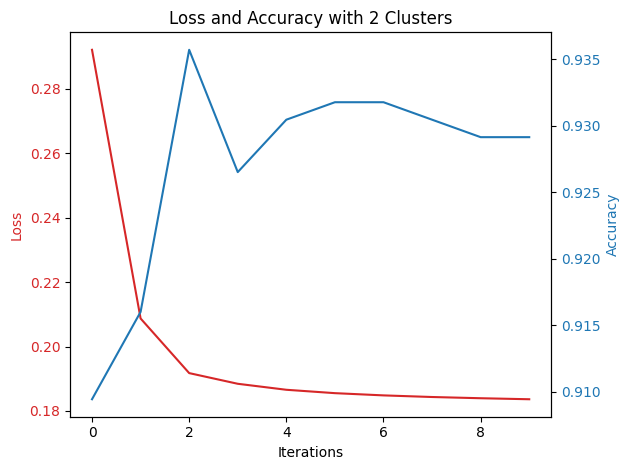

Completed training with 2 clusters in 1.09 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


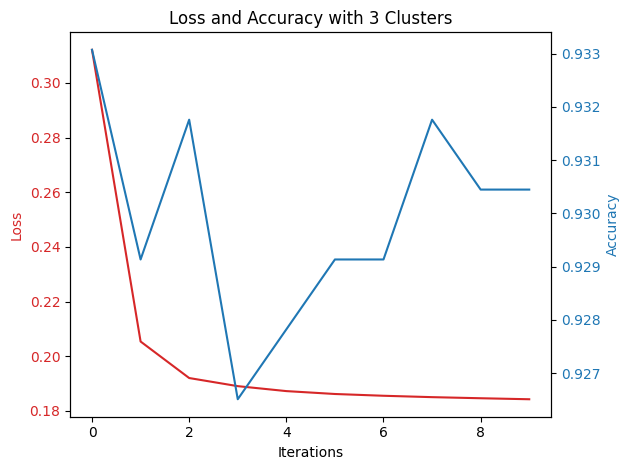

Completed training with 3 clusters in 0.96 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


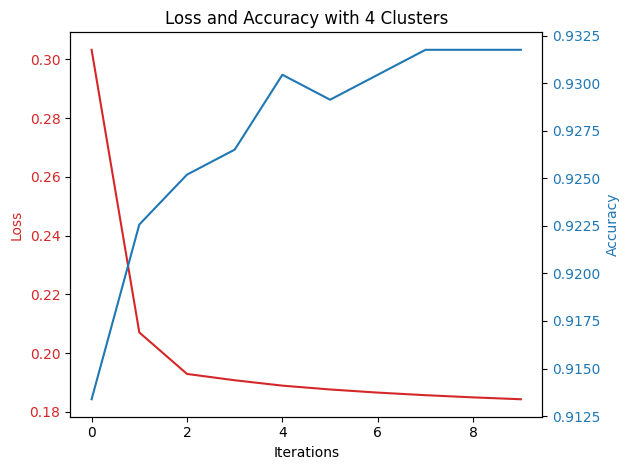

Completed training with 4 clusters in 1.42 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


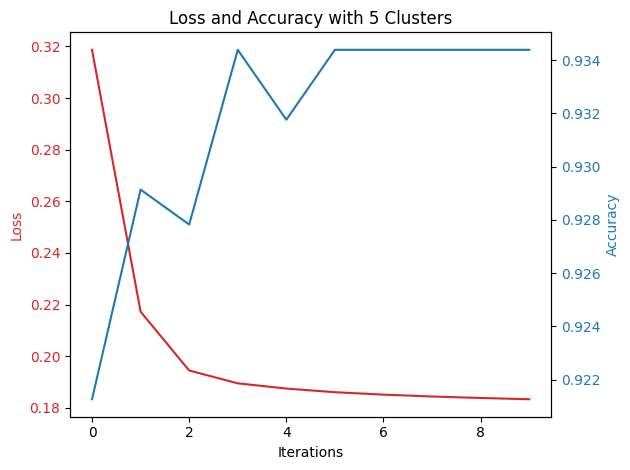

Completed training with 5 clusters in 1.27 seconds


In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assume 'fetch_ucirepo' function and 'rice_cammeo_and_osmancik' dataset are defined/imported elsewhere

# Data (as pandas dataframes)
X = rice_cammeo_and_osmancik.data.features.values
Y = rice_cammeo_and_osmancik.data.targets.values

# Encode the target variable as integers
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

# Function to plot loss and accuracy
def plot_loss_and_accuracy(losses, accuracies, n_clusters):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Iterations')
    ax1.set_ylabel('Loss', color=color)
    ax1.plot(losses, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Accuracy', color=color)
    ax2.plot(accuracies, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title(f"Loss and Accuracy with {n_clusters} Clusters")
    fig.tight_layout()
    plt.show()

# Set the range of cluster numbers to iterate through
cluster_numbers = range(2, 6)

for n_clusters in cluster_numbers:
    start_time = time.time()

    # Perform k-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)

    # One Hot encode the cluster labels
    encoder = OneHotEncoder(sparse=False)
    one_hot_clusters = encoder.fit_transform(cluster_labels.reshape(-1, 1))

    # Concatenate the one hot encoded clusters to X array
    X_with_clusters = np.concatenate((X, one_hot_clusters), axis=1)

    # Split the dataset into training and testing sets
    X_train_with_clusters, X_test_with_clusters, Y_train, Y_test = train_test_split(X_with_clusters, Y, test_size=0.2, random_state=42)

    # Normalize the features
    scaler = StandardScaler()
    X_train_scaled_with_clusters = scaler.fit_transform(X_train_with_clusters)
    X_test_scaled_with_clusters = scaler.transform(X_test_with_clusters)

    # Initialize the neural network model
    nn_model_with_clusters = MLPClassifier(hidden_layer_sizes=(100, 100), random_state=42)

    # Initialize lists to keep track of losses and accuracies
    losses = []
    accuracies = []

    # Number of iterations for partial fitting
    iterations = 10  # You may need to adjust this

    for i in range(iterations):
        # Partially fit the model on the training data
        nn_model_with_clusters.partial_fit(X_train_scaled_with_clusters, Y_train, classes=np.unique(Y_train))

        # Predict probabilities on the training set for loss calculation
        Y_prob = nn_model_with_clusters.predict_proba(X_train_scaled_with_clusters)
        train_loss = log_loss(Y_train, Y_prob)
        losses.append(train_loss)

        # Predict on the test set for accuracy calculation
        Y_pred_with_clusters = nn_model_with_clusters.predict(X_test_scaled_with_clusters)
        accuracy_with_clusters = accuracy_score(Y_test, Y_pred_with_clusters)
        accuracies.append(accuracy_with_clusters)

    # Plotting the loss and accuracy
    plot_loss_and_accuracy(losses, accuracies, n_clusters)

    elapsed_time = time.time() - start_time
    print(f"Completed training with {n_clusters} clusters in {elapsed_time:.2f} seconds")


In [ ]:
X_cluster_pd = pd.DataFrame(X_with_clusters)
X_cluster_pd

,0,1,2,3,4,5,6,7,8,9,10,11
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,0.0,0.0,1.0,0.0,0.0
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,0.0,1.0,0.0,0.0,0.0
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,0.0,1.0,0.0,0.0,0.0
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,0.0,0.0,0.0,1.0,0.0
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3805,11441.0,415.858002,170.486771,85.756592,0.864280,11628.0,0.681012,1.0,0.0,0.0,0.0,0.0
3806,11625.0,421.390015,167.714798,89.462570,0.845850,11904.0,0.694279,1.0,0.0,0.0,0.0,0.0
3807,12437.0,442.498993,183.572922,86.801979,0.881144,12645.0,0.626739,0.0,0.0,0.0,1.0,0.0
3808,9882.0,392.296997,161.193985,78.210480,0.874406,10097.0,0.659064,0.0,0.0,0.0,0.0,1.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


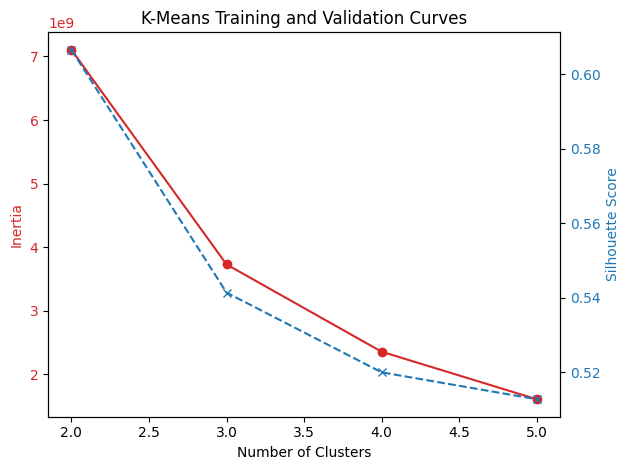

In [ ]:
import matplotlib.pyplot as plt

# Function to plot training and validation curves
def plot_training_and_validation_curves(inertias, silhouette_scores):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Number of Clusters')
    ax1.set_ylabel('Inertia', color=color)
    ax1.plot(range(2, 6), inertias, marker='o', linestyle='-', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Silhouette Score', color=color)
    ax2.plot(range(2, 6), silhouette_scores, marker='x', linestyle='--', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title('K-Means Training and Validation Curves')
    fig.tight_layout()
    plt.show()

inertias = []
silhouette_scores = []

# Calculate inertia and silhouette scores for each cluster configuration
from sklearn.metrics import silhouette_score
for n_clusters in range(2, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

plot_training_and_validation_curves(inertias, silhouette_scores)


## Expectation Maximization Clustering implementation on Rice Dataset

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.mixture import GaussianMixture

# Fetch dataset
rice_cammeo_and_osmancik = fetch_ucirepo(id=545)

# Data (as pandas dataframes)
X = rice_cammeo_and_osmancik.data.features.values
Y = rice_cammeo_and_osmancik.data.targets.values

# If Y is categorical, convert it to numerical values using LabelEncoder
label_encoder = LabelEncoder()
Y_numerical = label_encoder.fit_transform(Y)

# Perform Expectation-Maximization clustering with 3 components
em = GaussianMixture(n_components=3, random_state=42)
em.fit(X)
cluster_labels = em.predict(X)

# One Hot encode the cluster labels
encoder = OneHotEncoder(sparse=False, sparse_output=False)  # Updated parameter based on the warning
one_hot_clusters = encoder.fit_transform(cluster_labels.reshape(-1, 1))

# Concatenate the one hot encoded clusters to X array
X = np.concatenate((X, one_hot_clusters), axis=1)

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_numerical, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a simple neural network
nn_model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
nn_model.fit(X_train_scaled, Y_train)

# Make predictions and calculate mean squared error
Y_pred = nn_model.predict(X_test_scaled)
mse = mean_squared_error(Y_test, Y_pred)
print("Mean squared error:", mse)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Mean squared error: 0.05393405616111238


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


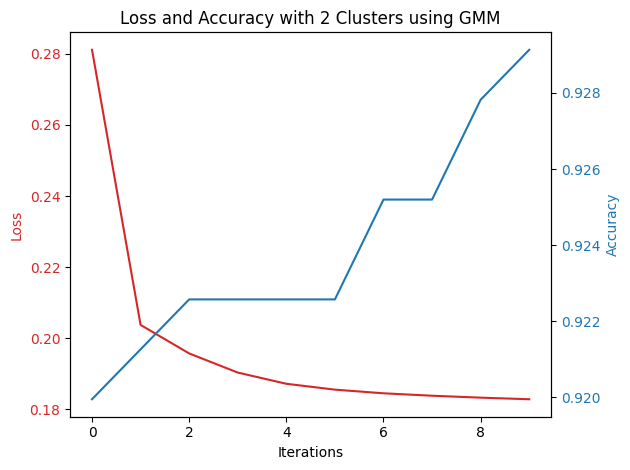

Completed training with 2 clusters using GMM in 0.79 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


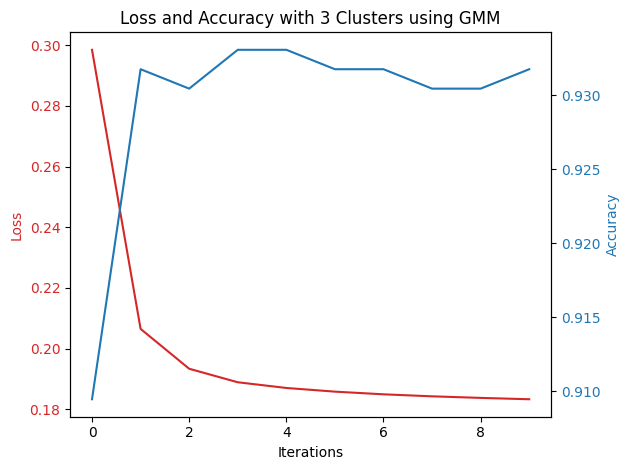

Completed training with 3 clusters using GMM in 1.06 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


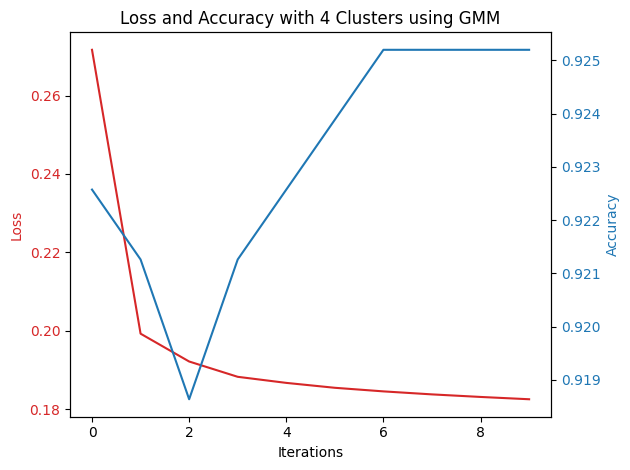

Completed training with 4 clusters using GMM in 0.88 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


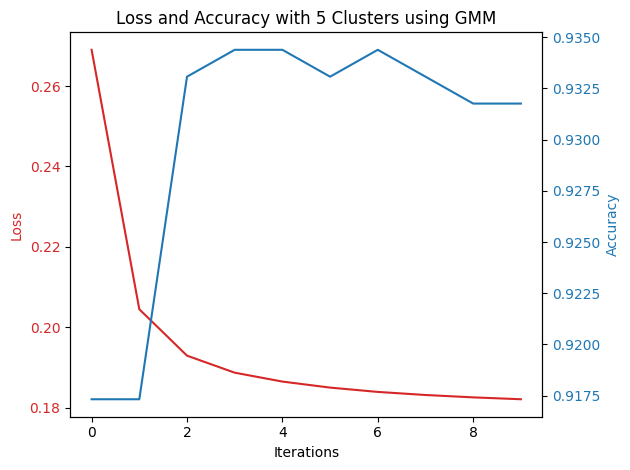

Completed training with 5 clusters using GMM in 0.84 seconds


In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.mixture import GaussianMixture


# Data (as pandas dataframes)
X = rice_cammeo_and_osmancik.data.features.values
Y = rice_cammeo_and_osmancik.data.targets.values

# Encode the target variable as integers
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

# Function to plot loss and accuracy
def plot_loss_and_accuracy(losses, accuracies, n_clusters):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Iterations')
    ax1.set_ylabel('Loss', color=color)
    ax1.plot(losses, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Accuracy', color=color)
    ax2.plot(accuracies, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title(f"Loss and Accuracy with {n_clusters} Clusters using GMM")
    fig.tight_layout()
    plt.show()

# Set the range of cluster numbers to iterate through
cluster_numbers = range(2, 6)

for n_clusters in cluster_numbers:
    start_time = time.time()

    # Perform EM clustering using Gaussian Mixture Model
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm.fit(X)
    cluster_labels = gmm.predict(X)

    # One Hot encode the cluster labels
    encoder = OneHotEncoder(sparse=False)
    one_hot_clusters = encoder.fit_transform(cluster_labels.reshape(-1, 1))

    # Concatenate the one hot encoded clusters to X array
    X_with_clusters = np.concatenate((X, one_hot_clusters), axis=1)

    # Split the dataset into training and testing sets
    X_train_with_clusters, X_test_with_clusters, Y_train, Y_test = train_test_split(X_with_clusters, Y, test_size=0.2, random_state=42)

    # Normalize the features
    scaler = StandardScaler()
    X_train_scaled_with_clusters = scaler.fit_transform(X_train_with_clusters)
    X_test_scaled_with_clusters = scaler.transform(X_test_with_clusters)

    # Initialize the neural network model
    nn_model_with_clusters = MLPClassifier(hidden_layer_sizes=(100, 100), random_state=42)

    # Initialize lists to keep track of losses and accuracies
    losses = []
    accuracies = []

    # Number of iterations for partial fitting
    iterations = 10  # You may need to adjust this

    for i in range(iterations):
        # Partially fit the model on the training data
        nn_model_with_clusters.partial_fit(X_train_scaled_with_clusters, Y_train, classes=np.unique(Y_train))

        # Predict probabilities on the training set for loss calculation
        Y_prob = nn_model_with_clusters.predict_proba(X_train_scaled_with_clusters)
        train_loss = log_loss(Y_train, Y_prob)
        losses.append(train_loss)

        # Predict on the test set for accuracy calculation
        Y_pred_with_clusters = nn_model_with_clusters.predict(X_test_scaled_with_clusters)
        accuracy_with_clusters = accuracy_score(Y_test, Y_pred_with_clusters)
        accuracies.append(accuracy_with_clusters)

    # Plotting the loss and accuracy
    plot_loss_and_accuracy(losses, accuracies, n_clusters)

    elapsed_time = time.time() - start_time
    print(f"Completed training with {n_clusters} clusters using GMM in {elapsed_time:.2f} seconds")

In [ ]:
X_cluster_pd = pd.DataFrame(X_with_clusters)
X_cluster_pd

,0,1,2,3,4,5,6,7,8,9,10,11
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,0.0,0.0,1.0,0.0,0.0
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,0.0,0.0,0.0,1.0,0.0
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,0.0,0.0,1.0,0.0,0.0
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,1.0,0.0,0.0,0.0,0.0
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3805,11441.0,415.858002,170.486771,85.756592,0.864280,11628.0,0.681012,0.0,1.0,0.0,0.0,0.0
3806,11625.0,421.390015,167.714798,89.462570,0.845850,11904.0,0.694279,0.0,0.0,0.0,0.0,1.0
3807,12437.0,442.498993,183.572922,86.801979,0.881144,12645.0,0.626739,1.0,0.0,0.0,0.0,0.0
3808,9882.0,392.296997,161.193985,78.210480,0.874406,10097.0,0.659064,0.0,1.0,0.0,0.0,0.0


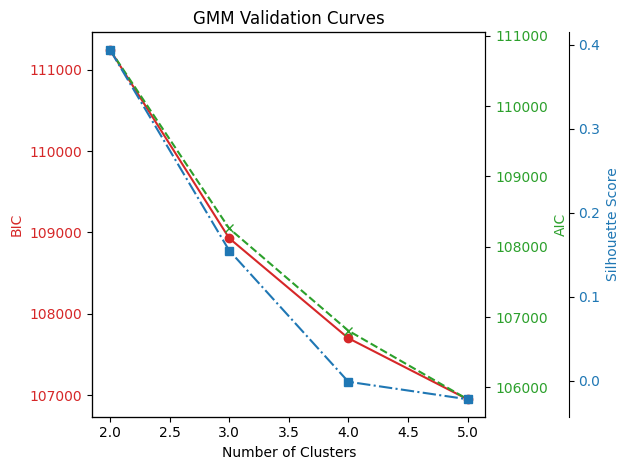

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Function to plot BIC, AIC, and silhouette scores for GMM
def plot_gmm_validation_curves(bics, aics, silhouette_scores):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Number of Clusters')
    ax1.set_ylabel('BIC', color=color)
    ax1.plot(range(2, 6), bics, marker='o', linestyle='-', color=color, label='BIC')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:green'
    ax2.set_ylabel('AIC', color=color)
    ax2.plot(range(2, 6), aics, marker='x', linestyle='--', color=color, label='AIC')
    ax2.tick_params(axis='y', labelcolor=color)

    ax3 = ax1.twinx()
    ax3.spines['right'].set_position(('outward', 60))
    color = 'tab:blue'
    ax3.set_ylabel('Silhouette Score', color=color)
    ax3.plot(range(2, 6), silhouette_scores, marker='s', linestyle='-.', color=color, label='Silhouette Score')
    ax3.tick_params(axis='y', labelcolor=color)

    plt.title('GMM Validation Curves')
    fig.tight_layout()
    plt.show()

bics = []
aics = []
silhouette_scores = []

# Calculate BIC, AIC, and silhouette scores for each cluster configuration
for n_clusters in range(2, 6):
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm.fit(X)
    bics.append(gmm.bic(X))
    aics.append(gmm.aic(X))
    cluster_labels = gmm.predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

plot_gmm_validation_curves(bics, aics, silhouette_scores)


## K-means clustering implementation on Spambase Dataset

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans

# Fetch dataset
spambase = fetch_ucirepo(id=94)

# Data (as pandas dataframes)
X2 = spambase.data.features.values
Y2 = spambase.data.targets.values

# If Y2 is categorical, convert it to numerical values using LabelEncoder
label_encoder = LabelEncoder()
Y2_numerical = label_encoder.fit_transform(Y2)

# Perform k-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X2)

# One Hot encode the cluster labels
encoder = OneHotEncoder(sparse=False, sparse_output=False)  # Updated parameter based on the warning
one_hot_clusters = encoder.fit_transform(cluster_labels.reshape(-1, 1))

# Concatenate the one hot encoded clusters to X array
X2 = np.concatenate((X2, one_hot_clusters), axis=1)

# Split the dataset into training and testing sets
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2_numerical, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train2_scaled = scaler.fit_transform(X_train2)
X_test2_scaled = scaler.transform(X_test2)

# Train a simple neural network
nn_model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
nn_model.fit(X_train2_scaled, Y_train2)

# Make predictions and calculate mean squared error
Y_pred2 = nn_model.predict(X_test2_scaled)
mse2 = mean_squared_error(Y_test2, Y_pred2)
print("Mean squared error:", mse2)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Mean squared error: 0.06487408229341525


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


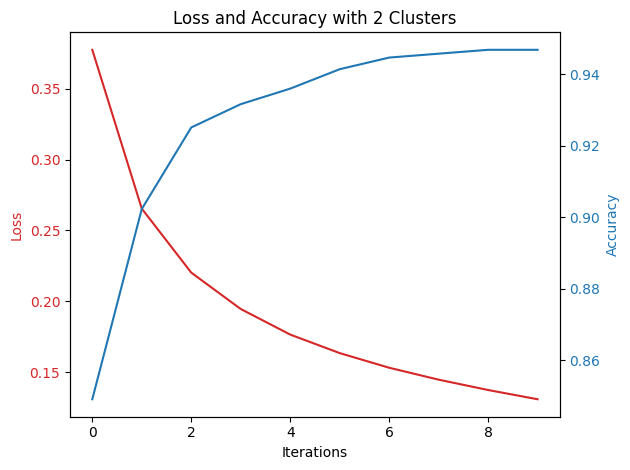

Completed training with 2 clusters in 1.24 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


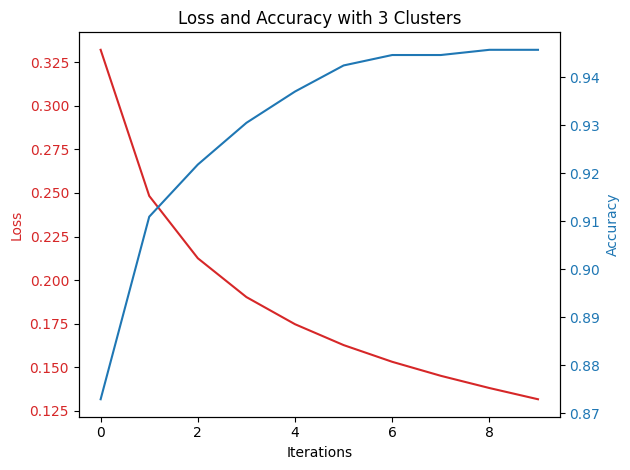

Completed training with 3 clusters in 1.55 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


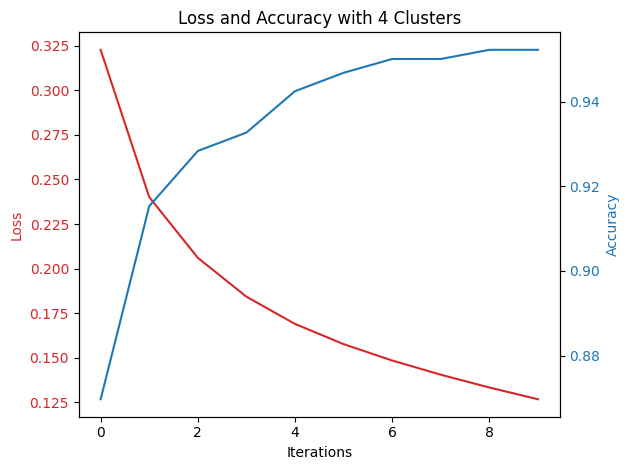

Completed training with 4 clusters in 1.56 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


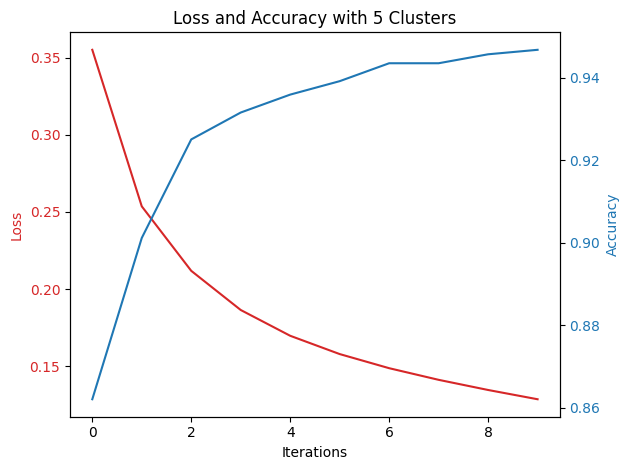

Completed training with 5 clusters in 1.61 seconds


In [ ]:

import pandas as pd
import numpy as np
import time
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assume 'fetch_ucirepo' function and 'rice_cammeo_and_osmancik' dataset are defined/imported elsewhere

# Fetch dataset
spambase = fetch_ucirepo(id=94)

# Data (as pandas dataframes)
X2 = spambase.data.features.values
Y2 = spambase.data.targets.values

# Encode the target variable as integers
label_encoder = LabelEncoder()
Y2 = label_encoder.fit_transform(Y2)

# Function to plot loss and accuracy
def plot_loss_and_accuracy(losses, accuracies, n_clusters):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Iterations')
    ax1.set_ylabel('Loss', color=color)
    ax1.plot(losses, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Accuracy', color=color)
    ax2.plot(accuracies, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title(f"Loss and Accuracy with {n_clusters} Clusters")
    fig.tight_layout()
    plt.show()

# Set the range of cluster numbers to iterate through
cluster_numbers = range(2, 6)

for n_clusters in cluster_numbers:
    start_time = time.time()

    # Perform k-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X2)

    # One Hot encode the cluster labels
    encoder = OneHotEncoder(sparse=False)
    one_hot_clusters = encoder.fit_transform(cluster_labels.reshape(-1, 1))

    # Concatenate the one hot encoded clusters to X array
    X2_with_clusters = np.concatenate((X2, one_hot_clusters), axis=1)

    # Split the dataset into training and testing sets
    X_train2_with_clusters, X_test2_with_clusters, Y_train2, Y_test2 = train_test_split(X2_with_clusters, Y2, test_size=0.2, random_state=42)

    # Normalize the features
    scaler = StandardScaler()
    X_train2_scaled_with_clusters = scaler.fit_transform(X_train2_with_clusters)
    X_test2_scaled_with_clusters = scaler.transform(X_test2_with_clusters)

    # Initialize the neural network model
    nn_model_with_clusters = MLPClassifier(hidden_layer_sizes=(100, 100), random_state=42)

    # Initialize lists to keep track of losses and accuracies
    losses = []
    accuracies = []

    # Number of iterations for partial fitting
    iterations = 10  # You may need to adjust this

    for i in range(iterations):
        # Partially fit the model on the training data
        nn_model_with_clusters.partial_fit(X_train2_scaled_with_clusters, Y_train2, classes=np.unique(Y_train2))

        # Predict probabilities on the training set for loss calculation
        Y_prob2 = nn_model_with_clusters.predict_proba(X_train2_scaled_with_clusters)
        train_loss = log_loss(Y_train2, Y_prob2)
        losses.append(train_loss)

        # Predict on the test set for accuracy calculation
        Y_pred2_with_clusters = nn_model_with_clusters.predict(X_test2_scaled_with_clusters)
        accuracy_with_clusters = accuracy_score(Y_test2, Y_pred2_with_clusters)
        accuracies.append(accuracy_with_clusters)

    # Plotting the loss and accuracy
    plot_loss_and_accuracy(losses, accuracies, n_clusters)

    elapsed_time = time.time() - start_time
    print(f"Completed training with {n_clusters} clusters in {elapsed_time:.2f} seconds")

In [ ]:
X2_cluster_pd = pd.DataFrame(X2_with_clusters)
X2_cluster_pd

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,3.756,61.0,278.0,1.0,0.0,0.0,0.0,0.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.180,0.048,5.114,101.0,1028.0,0.0,1.0,0.0,0.0,0.0
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.184,0.010,9.821,485.0,2259.0,0.0,0.0,1.0,0.0,0.0
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.000,3.537,40.0,191.0,1.0,0.0,0.0,0.0,0.0
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.000,3.537,40.0,191.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.000,1.142,3.0,88.0,1.0,0.0,0.0,0.0,0.0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,1.555,4.0,14.0,1.0,0.0,0.0,0.0,0.0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,1.404,6.0,118.0,1.0,0.0,0.0,0.0,0.0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,1.147,5.0,78.0,1.0,0.0,0.0,0.0,0.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


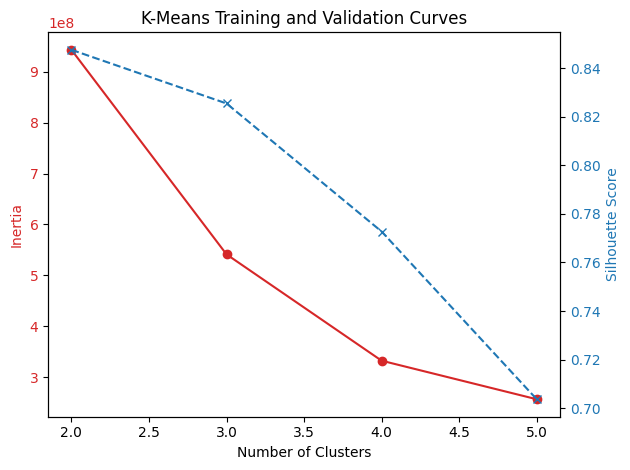

In [ ]:
import matplotlib.pyplot as plt

# Function to plot training and validation curves
def plot_training_and_validation_curves(inertias, silhouette_scores):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Number of Clusters')
    ax1.set_ylabel('Inertia', color=color)
    ax1.plot(range(2, 6), inertias, marker='o', linestyle='-', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Silhouette Score', color=color)
    ax2.plot(range(2, 6), silhouette_scores, marker='x', linestyle='--', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title('K-Means Training and Validation Curves')
    fig.tight_layout()
    plt.show()

inertias = []
silhouette_scores = []

# Calculate inertia and silhouette scores for each cluster configuration
from sklearn.metrics import silhouette_score
for n_clusters in range(2, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X2)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X2, cluster_labels))

plot_training_and_validation_curves(inertias, silhouette_scores)


## Expectation Maximization clustering implementation on Spambase Dataset

In [ ]:
# Fetch dataset
spambase = fetch_ucirepo(id=94)

# Data (as pandas dataframes)
X2 = spambase.data.features.values
Y2 = spambase.data.targets.values

# Encode the target variable as integers
label_encoder = LabelEncoder()
Y2 = label_encoder.fit_transform(Y2)

# Perform Expectation-Maximization clustering with 3 components
em = GaussianMixture(n_components=3, random_state=42)
em.fit(X2)
cluster_labels = em.predict(X2)

# One Hot encode the cluster labels
encoder = OneHotEncoder(sparse=False, sparse_output=False)  # Updated parameter based on the warning
one_hot_clusters = encoder.fit_transform(cluster_labels.reshape(-1, 1))

# Concatenate the one hot encoded clusters to X array
X2 = np.concatenate((X2, one_hot_clusters), axis=1)

# Split the dataset into training and testing sets
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train2_scaled = scaler.fit_transform(X_train2)
X_test2_scaled = scaler.transform(X_test2)

# Train a simple neural network
nn_model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
nn_model.fit(X_train2_scaled, Y_train2)

# Make predictions and calculate mean squared error
Y_pred2 = nn_model.predict(X_test2_scaled)
mse2 = mean_squared_error(Y_test2, Y_pred2)
print("Mean squared error:", mse2)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Mean squared error: 0.05786671732796512


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


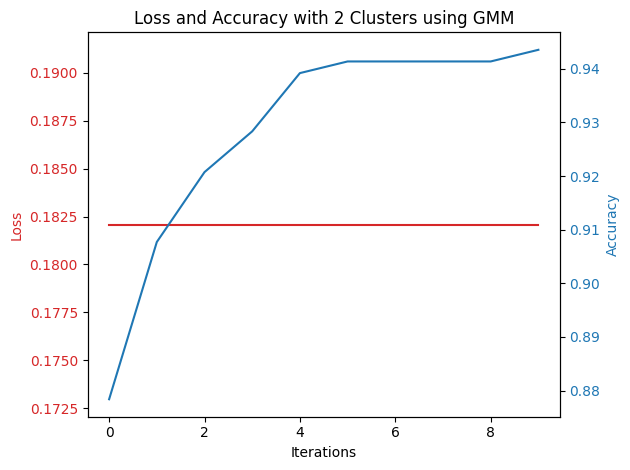

Completed training with 2 clusters using GMM in 1.28 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


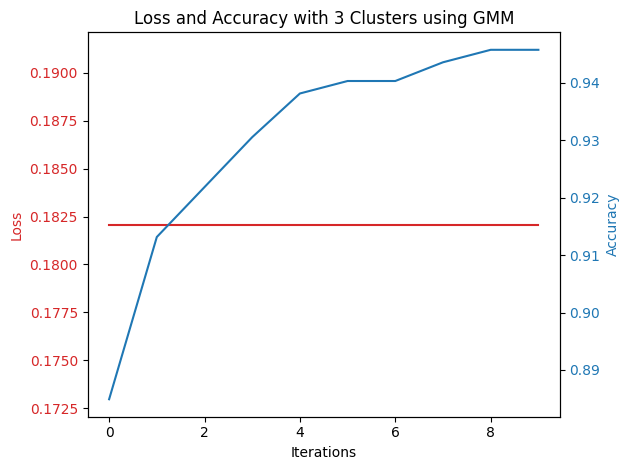

Completed training with 3 clusters using GMM in 1.30 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


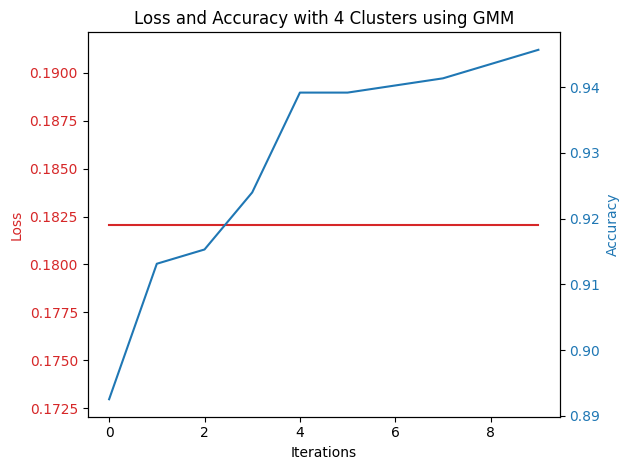

Completed training with 4 clusters using GMM in 1.29 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


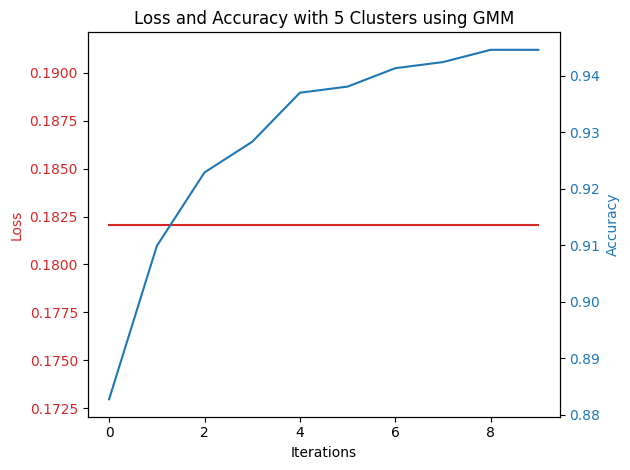

Completed training with 5 clusters using GMM in 1.55 seconds


In [ ]:

import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.mixture import GaussianMixture

# Fetch dataset
spambase = fetch_ucirepo(id=94)

# Data (as pandas dataframes)
X2 = spambase.data.features.values
Y2 = spambase.data.targets.values

# Encode the target variable as integers
label_encoder = LabelEncoder()
Y2 = label_encoder.fit_transform(Y2)

# Function to plot loss and accuracy
def plot_loss_and_accuracy(losses, accuracies, n_clusters):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Iterations')
    ax1.set_ylabel('Loss', color=color)
    ax1.plot(losses, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Accuracy', color=color)
    ax2.plot(accuracies, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title(f"Loss and Accuracy with {n_clusters} Clusters using GMM")
    fig.tight_layout()
    plt.show()

# Set the range of cluster numbers to iterate through
cluster_numbers = range(2, 6)

for n_clusters in cluster_numbers:
    start_time = time.time()

    # Perform EM clustering using Gaussian Mixture Model
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm.fit(X2)
    cluster_labels = gmm.predict(X2)

    # One Hot encode the cluster labels
    encoder = OneHotEncoder(sparse=False)
    one_hot_clusters = encoder.fit_transform(cluster_labels.reshape(-1, 1))

    # Concatenate the one hot encoded clusters to X array
    X2_with_clusters = np.concatenate((X2, one_hot_clusters), axis=1)

    # Split the dataset into training and testing sets
    X_train2_with_clusters, X_test2_with_clusters, Y_train2, Y_test2 = train_test_split(X2_with_clusters, Y2, test_size=0.2, random_state=42)

    # Normalize the features
    scaler = StandardScaler()
    X_train2_scaled_with_clusters = scaler.fit_transform(X_train2_with_clusters)
    X_test2_scaled_with_clusters = scaler.transform(X_test2_with_clusters)

    # Initialize the neural network model
    nn_model_with_clusters = MLPClassifier(hidden_layer_sizes=(100, 100), random_state=42)

    # Initialize lists to keep track of losses and accuracies
    losses = []
    accuracies = []

    # Number of iterations for partial fitting
    iterations = 10  # You may need to adjust this

    for i in range(iterations):
        # Partially fit the model on the training data
        nn_model_with_clusters.partial_fit(X_train2_scaled_with_clusters, Y_train2, classes=np.unique(Y_train2))

        # Predict probabilities on the training set for loss calculation
        Y_prob2 = nn_model_with_clusters.predict_proba(X_train2_scaled_with_clusters)
        train_loss = log_loss(Y_train, Y_prob)
        losses.append(train_loss)

        # Predict on the test set for accuracy calculation
        Y_pred2_with_clusters = nn_model_with_clusters.predict(X_test2_scaled_with_clusters)
        accuracy_with_clusters = accuracy_score(Y_test2, Y_pred2_with_clusters)
        accuracies.append(accuracy_with_clusters)

    # Plotting the loss and accuracy
    plot_loss_and_accuracy(losses, accuracies, n_clusters)

    elapsed_time = time.time() - start_time
    print(f"Completed training with {n_clusters} clusters using GMM in {elapsed_time:.2f} seconds")


In [ ]:
X2_cluster_pd = pd.DataFrame(X2_with_clusters)
X2_cluster_pd

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,3.756,61.0,278.0,0.0,0.0,1.0,0.0,0.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.180,0.048,5.114,101.0,1028.0,0.0,0.0,1.0,0.0,0.0
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.184,0.010,9.821,485.0,2259.0,0.0,1.0,0.0,0.0,0.0
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.000,3.537,40.0,191.0,0.0,0.0,1.0,0.0,0.0
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.000,3.537,40.0,191.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.000,1.142,3.0,88.0,0.0,0.0,0.0,0.0,1.0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,1.555,4.0,14.0,1.0,0.0,0.0,0.0,0.0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,1.404,6.0,118.0,1.0,0.0,0.0,0.0,0.0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,1.147,5.0,78.0,0.0,0.0,0.0,0.0,1.0


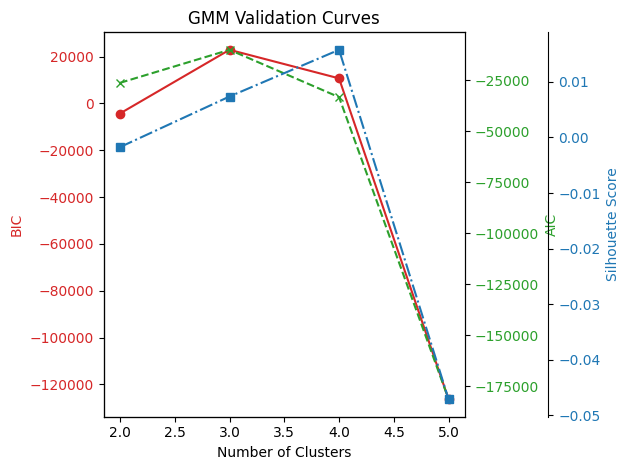

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Function to plot BIC, AIC, and silhouette scores for GMM
def plot_gmm_validation_curves(bics, aics, silhouette_scores):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Number of Clusters')
    ax1.set_ylabel('BIC', color=color)
    ax1.plot(range(2, 6), bics, marker='o', linestyle='-', color=color, label='BIC')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:green'
    ax2.set_ylabel('AIC', color=color)
    ax2.plot(range(2, 6), aics, marker='x', linestyle='--', color=color, label='AIC')
    ax2.tick_params(axis='y', labelcolor=color)

    ax3 = ax1.twinx()
    ax3.spines['right'].set_position(('outward', 60))
    color = 'tab:blue'
    ax3.set_ylabel('Silhouette Score', color=color)
    ax3.plot(range(2, 6), silhouette_scores, marker='s', linestyle='-.', color=color, label='Silhouette Score')
    ax3.tick_params(axis='y', labelcolor=color)

    plt.title('GMM Validation Curves')
    fig.tight_layout()
    plt.show()

bics = []
aics = []
silhouette_scores = []

# Calculate BIC, AIC, and silhouette scores for each cluster configuration
for n_clusters in range(2, 6):
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm.fit(X2)
    bics.append(gmm.bic(X2))
    aics.append(gmm.aic(X2))
    cluster_labels = gmm.predict(X2)
    silhouette_scores.append(silhouette_score(X2, cluster_labels))

plot_gmm_validation_curves(bics, aics, silhouette_scores)